In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
path = '../runs/metal_MI_r12_PNeuc_n5s5q15Vtb4_SGD0.1Drop204050_basetest_chkpt031_vs_metal_MI_r12_PNeuc_n5s5q15Vtb4_SGD0.1Drop204050_basetest_chkpt041//novel_acc_variance_10.txt'

In [3]:
file = open(path, 'r')
lines = file.readlines()[3:]
print(len(lines))

100


In [4]:
p = re.compile(r'Alg1: Loss\s*(?P<loss1>\d+\.\d+)\s*Acc\s*(?P<accu1>\d+\.\d+)\s*AccStd\s*\d+\.\d+\s*±\s*(?P<std1>\d+\.\d+)\s*Alg2: Loss\s*(?P<loss2>\d+\.\d+)\s*Acc\s*(?P<accu2>\d+\.\d+)\s*AccStd\s*\d+\.\d+\s*±\s*(?P<std2>\d+\.\d+)')
p2 = re.compile(r'\d+[.]\d+') #

In [5]:
# another way is use the regular expression r'\d+[.]\d+' and find all such occurences.

In [6]:
alg1_accu = []
alg1_loss = []
alg1_95 = []
alg2_accu = []
alg2_loss = []
alg2_95 = []

In [7]:
for i in range(len(lines)):
    m = p.search(lines[i].replace("%",""))
#     print(m)
#     print(p2.findall(lines[9 * i + 8]))
    if m:
        # if m is not None then have found a matching pattern
        alg1_accu.append(float(m.group('accu1')))
        alg1_loss.append(float(m.group('loss1')))
        alg1_95.append(float(m.group('std1')))
        alg2_accu.append(float(m.group('accu2')))
        alg2_loss.append(float(m.group('loss2')))
        alg2_95.append(float(m.group('std2')))

alg2_accu = np.array(alg2_accu)
alg1_accu = np.array(alg1_accu)

In [8]:
len(alg2_accu)

100

In [9]:
np.mean(alg1_accu)

75.87298

In [10]:
np.mean(alg1_95)

0.1091

In [11]:
np.mean(alg2_accu)

76.59701

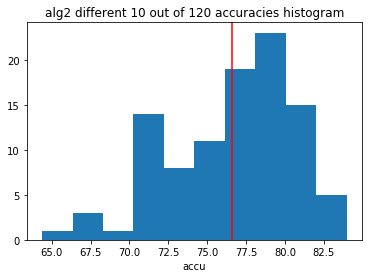

In [22]:
plt.hist(alg2_accu)
plt.xlabel('accu')
plt.title('alg2 different 10 out of 120 accuracies histogram')
plt.axvline(x=np.mean(alg2_accu), color='r')

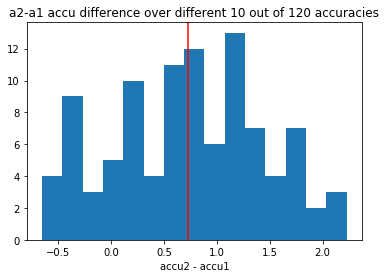

In [13]:
plt.hist(alg2_accu - alg1_accu, bins=15)
plt.xlabel('accu2 - accu1')
plt.title('a2-a1 accu difference over different 10 out of 120 accuracies')
plt.axvline(x=np.mean(alg2_accu - alg1_accu), color='r')

In [14]:
np.sum(alg2_accu < alg1_accu)

17

In [15]:
# note that this only checks for intersection.
# if the lower performing model's CI is actually completely higher than
# the high performing model's CI, it won't be found by this
def intersect(midpoint_1, width_1, midpoint_2, width_2):
    not_intersect = (midpoint_1 + width_1 < midpoint_2 - width_2) or (midpoint_2 + width_2 < midpoint_1 - width_1)
    return not not_intersect

In [16]:
# this checks for conclusion flips when the CIs dont overlap.
# if expected_smaller_midpoint is 1 then we need midpoint_2 + width_2 < midpoint_1 - width_1 (default)
# if expected_smaller_midpoint is 2 then we need midpoint_1 + width_1 < midpoint_2 - width_2
def flip_without_intersect(midpoint_1, width_1, midpoint_2, width_2, expected_smaller_midpoint=1):
    if expected_smaller_midpoint == 1:
        return midpoint_2 + width_2 < midpoint_1 - width_1
    else:
        return midpoint_1 + width_1 < midpoint_2 - width_2

In [17]:
intersection_indicator = []
for accu1, width_1, accu2, width_2 in zip(alg1_accu, alg1_95, alg2_accu, alg2_95):
    its = intersect(
                midpoint_1=accu1,
                width_1=width_1,
                midpoint_2=accu2,
                width_2=width_2)
    if its:
        print(accu1, width_1, accu2, width_2)
    intersection_indicator.append(its)

74.25 0.13 74.424 0.12
70.958 0.14 71.206 0.13
77.651 0.09 77.496 0.1
81.586 0.13 81.464 0.13
76.475 0.13 76.643 0.13
67.645 0.15 67.845 0.15
77.022 0.11 76.948 0.11
75.88 0.12 76.036 0.12
74.25 0.1 74.324 0.1
76.319 0.13 76.392 0.13
71.265 0.12 71.292 0.12
67.452 0.13 67.211 0.13
72.951 0.11 72.999 0.11
79.431 0.09 79.556 0.1


In [18]:
np.sum(intersection_indicator)

14

In [19]:
flips_without_intersection_indicator = []
for accu1, width_1, accu2, width_2 in zip(alg1_accu, alg1_95, alg2_accu, alg2_95):
    flip_wo_its = flip_without_intersect(
                midpoint_1=accu1,
                width_1=width_1,
                midpoint_2=accu2,
                width_2=width_2,
                expected_smaller_midpoint=1)
    if flip_wo_its:
        print(accu1, width_1, accu2, width_2)
    flips_without_intersection_indicator.append(flip_wo_its)

72.203 0.12 71.842 0.12
66.837 0.12 66.453 0.12
82.871 0.09 82.219 0.09
77.938 0.1 77.615 0.09
74.732 0.12 74.412 0.12
81.239 0.1 80.872 0.11
64.794 0.11 64.391 0.11
71.606 0.11 71.266 0.11
80.883 0.09 80.279 0.09
74.983 0.11 74.415 0.11
78.495 0.11 78.189 0.12
71.742 0.11 71.127 0.12
71.885 0.11 71.572 0.11


In [20]:
np.sum(flips_without_intersection_indicator)

13